## Step 1 - Prepare data

Download the clean dataset using the code below:

In [60]:
# First run this code to download the csv files
!wget -O 2016_edmonton_tax_assessment_clean.csv 'https://docs.google.com/uc?export=download&id=1lNiwoOPC8XSxkAlKoQ-G--r8P4CIIxkm&confirm=t'


--2024-02-13 00:11:53--  https://docs.google.com/uc?export=download&id=1lNiwoOPC8XSxkAlKoQ-G--r8P4CIIxkm&confirm=t
Resolving docs.google.com (docs.google.com)... 172.253.115.138, 172.253.115.101, 172.253.115.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lNiwoOPC8XSxkAlKoQ-G--r8P4CIIxkm&export=download [following]
--2024-02-13 00:11:53--  https://drive.usercontent.google.com/download?id=1lNiwoOPC8XSxkAlKoQ-G--r8P4CIIxkm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2004 (2.0K) [text/html]
Saving to: ‘2016_edmonton_tax_assessment_clean.csv’

2016_edmonton_tax_a 100%[===================>] 

**Initial Dataset Preparation:** Review the provided dataset to understand its structure and features. I then removed any unnecessary columns (I won't be using 'Account Number' and 'Neighbourhood' in this notebook) and split it into training and test sets (33% for test).

In [36]:
import pandas as pd

data = pd.read_csv('/content/2016_tax_train.csv')

In [37]:
data

,Account Number,Latitude,Longitude,Neighbourhood,Actual Year Built,Garage,Zoning,Lot Size,Assessed Value,EPSB,...,Single Detached House,Duplex/Fourplex,Row House,Apartment (5+ Stories),Apartment (1-4 Stories),Manufactured/Mobile Home,Institution/Collective Residence,Hotel/Motel,RV/Tent/Other,No Response
0,3715729,53.51163,-113.64354,LYMBURN,1992.0,1,RF1,478.600,368500.0,5.0,...,4183.0,317.0,0.953020,0.000000,0.035235,0.000000,0.003356,0.000000,0.008389,0.0
1,9951460,53.58782,-113.44804,BALWIN,1997.0,1,RF3,218.357,291500.0,2.0,...,2282.0,461.0,0.285449,0.000000,0.711770,0.000000,0.000000,0.000000,0.002780,0.0
2,4074316,53.61820,-113.43211,MATT BERRY,1990.0,1,RF1,585.030,473000.0,2.0,...,3582.0,188.0,0.238866,0.000000,0.696356,0.044534,0.020243,0.000000,0.000000,0.0
3,10405451,53.42161,-113.61200,AMBLESIDE,2014.0,1,RF4,286.449,391500.0,8.0,...,2550.0,425.0,0.110807,0.215458,0.671683,0.000000,0.000000,0.000000,0.002052,0.0
4,10041034,53.46015,-113.39263,SILVER BERRY,2004.0,0,RF5,278.013,265500.0,7.0,...,6343.0,1322.0,0.253743,0.000000,0.738024,0.000000,0.008234,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86199,4102190,53.56741,-113.39247,RUNDLE HEIGHTS,1972.0,0,RF5,229.463,124000.0,4.0,...,1133.0,132.0,0.646455,0.000000,0.351679,0.000000,0.000000,0.000000,0.001866,0.0
86200,2606309,53.54056,-113.56500,GLENORA,2013.0,1,RF1,893.989,1223500.0,3.0,...,2932.0,26.0,0.016216,0.747748,0.219820,0.003604,0.012613,0.000000,0.000000,0.0
86201,6520258,53.59813,-113.43085,BELVEDERE,1965.0,1,RF1,527.035,264500.0,2.0,...,2064.0,448.0,0.157320,0.138878,0.634927,0.000000,0.061347,0.007527,0.000000,0.0
86202,9030636,53.54414,-113.43585,TERRACE HEIGHTS,1959.0,1,RF1,574.676,472500.0,4.0,...,1246.0,103.0,0.000000,0.345116,0.476279,0.001860,0.176744,0.000000,0.000000,0.0


In [38]:
from sklearn.model_selection import train_test_split


data_cleaned = data.drop(['Account Number', 'Neighbourhood'], axis=1)

train_set, test_set = train_test_split(data_cleaned, test_size=0.33, random_state=42)


train_set.shape, test_set.shape


((57756, 28), (28448, 28))

**Build Data processing part of the pipeline:**
Developed a pipeline that incorporates the following steps:

* **Feature Engineering:** Calculate the distance of each property from the city center (The latitude of Edmonton, AB, Canada is 53.631611, and the longitude is -113.323975), adding a valuable spatial feature to your dataset.
* **Feature Transformation:** Using `FeatureUnion` to apply feature scaling and one-hot encoding simultaneously, preparing the numerical and categorical variables for modeling. I also used `ColumnTransformer` to make sure you apply the right operations to the right columns.
* **Remove Latitude and Longitude** - I don't need it in training after I calculated distance

First here is the function to calculate distance given lat and long of two points:

In [39]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
import math

In [40]:
import math

def distance(lat1, lon1):
    """
    Calculate the Haversine distance.
    ssrc: https://gist.github.com/rochacbruno/2883505?permalink_comment_id=2615334

    Parameters
    ----------
    lat1 - Latitude
    lon1 - Longitude

    Returns
    -------
    distance_in_km : float
    """
    lat2, lon2 = (53.631611, -113.323975) # city center
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def calculate_distance(X):
    return pd.DataFrame(X.apply(lambda x: distance(x.Latitude, x.Longitude), axis=1))

def names(t, add_name):
    return ["distance_to_center"]

To add new feature apply this transformer:
```python
ColumnTransformer([('distance_to_center', FunctionTransformer(calculate_distance, validate=False, feature_names_out=add_name), ['Latitude', 'Longitude'])])
    
```

In [41]:
u = list(data.select_dtypes(include=['int64', 'float64']).columns)
u

['Account Number',
 'Latitude',
 'Longitude',
 'Actual Year Built',
 'Garage',
 'Lot Size',
 'Assessed Value',
 'EPSB',
 'Ward',
 'Less than $30,000',
 '$30,000 to less than $60,000',
 '$60,000 to less than $100,000',
 '$100,000 to less than $125,000',
 '$125,000 to less than $150,000',
 '$150,000 to less than $200,000',
 '$200,000 to less than $250,000',
 '$250,000 or more',
 'No Response_struct',
 'Single Detached House',
 'Duplex/Fourplex',
 'Row House',
 'Apartment (5+ Stories)',
 'Apartment (1-4 Stories)',
 'Manufactured/Mobile Home',
 'Institution/Collective Residence',
 'Hotel/Motel',
 'RV/Tent/Other',
 'No Response']

In [1]:
##Below code is prepared after getting the 25 best numrical features from the k-best test done after this part

In [42]:

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])


data_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, list(data.select_dtypes(include=['int64', 'float64']).columns)[3:6] + list(data.select_dtypes(include=['int64', 'float64']).columns)[7:12] + list(data.select_dtypes(include=['int64', 'float64']).columns)[13:18] + list(data.select_dtypes(include=['int64', 'float64']).columns)[19:22] + list(data.select_dtypes(include=['int64', 'float64']).columns)[23:25] + list(data.select_dtypes(include=['int64', 'float64']).columns)[26:27]),
    ('cat', categorical_pipeline, list(data.select_dtypes(include=['object', 'category']).columns)[1:]),
    ('distance_to_center', FunctionTransformer(calculate_distance, validate=False), ['Latitude', 'Longitude'])
], remainder='drop')

train_set_transformed = data_pipeline.fit_transform(train_set)

train_set_transformed.shape


(57756, 26)

In [43]:
import pandas as pd


train_set_transformed = data_pipeline.fit_transform(train_set)

numerical_features = data_pipeline.named_transformers_['num'].get_feature_names_out()

categorical_features = data_pipeline.named_transformers_['cat']['one_hot'].get_feature_names_out()


all_feature_names = np.concatenate([numerical_features, categorical_features, ['distance_to_center']])

transformed_df = pd.DataFrame(train_set_transformed, columns=all_feature_names)

print(transformed_df.shape)


transformed_df.head()


(57756, 26)


,Actual Year Built,Garage,Lot Size,EPSB,Ward,"Less than $30,000","$30,000 to less than $60,000","$60,000 to less than $100,000","$125,000 to less than $150,000","$150,000 to less than $200,000",...,Manufactured/Mobile Home,Institution/Collective Residence,RV/Tent/Other,Zoning_RF1,Zoning_RF2,Zoning_RF3,Zoning_RF4,Zoning_RF5,Zoning_RF6,distance_to_center
0,0.282417,0.416988,1.430936,-1.432560,-0.066652,0.328128,1.168707,2.221265,0.401446,-0.067264,...,-0.126552,-0.384511,-0.097085,1.0,0.0,0.0,0.0,0.0,0.0,11.194366
1,-0.979381,0.416988,0.689964,-1.432560,-0.354728,-0.296659,-0.504138,-1.162707,-1.333907,-1.107406,...,-0.126552,-0.246228,-0.097085,1.0,0.0,0.0,0.0,0.0,0.0,13.049079
2,-0.008767,0.416988,0.896704,0.543512,-1.218957,-0.665122,-0.154007,1.347855,-0.599961,-0.262406,...,-0.126552,-0.160353,0.061478,1.0,0.0,0.0,0.0,0.0,0.0,22.623020
3,0.767723,0.416988,-1.478692,-1.037345,0.221424,-0.248598,-0.177349,-0.314563,-0.550095,-0.423433,...,-0.126552,-0.384511,-0.097085,0.0,0.0,0.0,0.0,1.0,0.0,5.161023
4,-0.008767,0.416988,0.514171,-1.037345,0.221424,-0.681143,-1.313328,-1.655419,-1.782724,-1.453410,...,-0.126552,-0.379412,-0.097085,1.0,0.0,0.0,0.0,0.0,0.0,6.529463


In [44]:
columns = transformed_df.columns.tolist()
columns

['Actual Year Built',
 'Garage',
 'Lot Size',
 'EPSB',
 'Ward',
 'Less than $30,000',
 '$30,000 to less than $60,000',
 '$60,000 to less than $100,000',
 '$125,000 to less than $150,000',
 '$150,000 to less than $200,000',
 '$200,000 to less than $250,000',
 '$250,000 or more',
 'No Response_struct',
 'Duplex/Fourplex',
 'Row House',
 'Apartment (5+ Stories)',
 'Manufactured/Mobile Home',
 'Institution/Collective Residence',
 'RV/Tent/Other',
 'Zoning_RF1',
 'Zoning_RF2',
 'Zoning_RF3',
 'Zoning_RF4',
 'Zoning_RF5',
 'Zoning_RF6',
 'distance_to_center']

In [45]:
test_set_transformed = data_pipeline.fit_transform(test_set)
test_set_transformed.shape

(28448, 26)

 * **Feature Selection:** Add a k-best feature selection method to identify and retain the most informative features for predicting tax assessments.

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression


k = 25

select_k_best = SelectKBest(f_regression, k=k)


y_train = train_set['Assessed Value']
y_test = test_set['Assessed Value']

train_set_selected = select_k_best.fit_transform(train_set_transformed, y_train)

test_set_selected = select_k_best.transform(test_set_transformed)

train_set_selected_shape = train_set_selected.shape
test_set_selected_shape = test_set_selected.shape

selected_feature_names = [f'selected_feature_{i}' for i in range(train_set_selected.shape[1])]


train_set_selected_df = pd.DataFrame(train_set_selected, columns=selected_feature_names)

train_set_selected_shape, test_set_selected_shape, train_set_selected_df.head()


((57756, 25),
 (28448, 25),
    selected_feature_0  selected_feature_1  selected_feature_2  \
 0            0.282417            0.416988            1.430936   
 1           -0.979381            0.416988            0.689964   
 2           -0.008767            0.416988            0.896704   
 3            0.767723            0.416988           -1.478692   
 4           -0.008767            0.416988            0.514171   
 
    selected_feature_3  selected_feature_4  selected_feature_5  \
 0           -1.432560           -0.066652            0.328128   
 1           -1.432560           -0.354728           -0.296659   
 2            0.543512           -1.218957           -0.665122   
 3           -1.037345            0.221424           -0.248598   
 4           -1.037345            0.221424           -0.681143   
 
    selected_feature_6  selected_feature_7  selected_feature_8  \
 0            1.168707            2.221265            0.401446   
 1           -0.504138           -1.162707  

In [47]:

select_k_best.fit(train_set_transformed, y_train)

selected_features_mask = select_k_best.get_support()


selected_feature_names = all_feature_names[selected_features_mask]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['Actual Year Built' 'Garage' 'Lot Size' 'EPSB' 'Ward' 'Less than $30,000'
 '$30,000 to less than $60,000' '$60,000 to less than $100,000'
 '$125,000 to less than $150,000' '$150,000 to less than $200,000'
 '$200,000 to less than $250,000' '$250,000 or more' 'No Response_struct'
 'Duplex/Fourplex' 'Row House' 'Apartment (5+ Stories)'
 'Manufactured/Mobile Home' 'Institution/Collective Residence'
 'RV/Tent/Other' 'Zoning_RF1' 'Zoning_RF3' 'Zoning_RF4' 'Zoning_RF5'
 'Zoning_RF6' 'distance_to_center']


In [ ]:


##Below codes are the one that I ran to test k = 10 and k = 20



In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


k = 20

select_k_best = SelectKBest(f_regression, k=k)


y_train = train_set['Assessed Value']
y_test = test_set['Assessed Value']

train_set_selected = select_k_best.fit_transform(train_set_transformed, y_train)

test_set_selected = select_k_best.transform(test_set_transformed)

train_set_selected_shape = train_set_selected.shape
test_set_selected_shape = test_set_selected.shape

selected_feature_names = [f'selected_feature_{i}' for i in range(train_set_selected.shape[1])]


train_set_selected_df = pd.DataFrame(train_set_selected, columns=selected_feature_names)

train_set_selected_shape, test_set_selected_shape, train_set_selected_df.head()


((57756, 7),
 (28448, 7),
    selected_feature_0  selected_feature_1  selected_feature_2  \
 0            0.416988            1.430936           -0.067264   
 1            0.416988            0.689964           -1.107406   
 2            0.416988            0.896704           -0.262406   
 3            0.416988           -1.478692           -0.423433   
 4            0.416988            0.514171           -1.453410   
 
    selected_feature_3  selected_feature_4  selected_feature_5  \
 0           -0.541662           -0.500129                 1.0   
 1           -1.020608           -0.595136                 1.0   
 2           -0.494110           -0.171536                 1.0   
 3           -0.466156           -0.625643                 0.0   
 4           -1.042219           -0.697855                 1.0   
 
    selected_feature_6  
 0                 0.0  
 1                 0.0  
 2                 0.0  
 3                 1.0  
 4                 0.0  )

In [ ]:

select_k_best.fit(train_set_transformed, y_train)

selected_features_mask = select_k_best.get_support()


selected_feature_names = all_feature_names[selected_features_mask]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['Garage' 'Lot Size' '$150,000 to less than $200,000'
 '$200,000 to less than $250,000' '$250,000 or more' 'Zoning_RF1'
 'Zoning_RF5']


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


k = 10

select_k_best = SelectKBest(f_regression, k=k)


y_train = train_set['Assessed Value']
y_test = test_set['Assessed Value']

train_set_selected = select_k_best.fit_transform(train_set_transformed, y_train)

test_set_selected = select_k_best.transform(test_set_transformed)

train_set_selected_shape = train_set_selected.shape
test_set_selected_shape = test_set_selected.shape

selected_feature_names = [f'selected_feature_{i}' for i in range(train_set_selected.shape[1])]


train_set_selected_df = pd.DataFrame(train_set_selected, columns=selected_feature_names)

train_set_selected_shape, test_set_selected_shape, train_set_selected_df.head()


((57756, 4),
 (28448, 4),
    selected_feature_0  selected_feature_1  selected_feature_2  \
 0            1.430936           -0.067264           -0.541662   
 1            0.689964           -1.107406           -1.020608   
 2            0.896704           -0.262406           -0.494110   
 3           -1.478692           -0.423433           -0.466156   
 4            0.514171           -1.453410           -1.042219   
 
    selected_feature_3  
 0           -0.500129  
 1           -0.595136  
 2           -0.171536  
 3           -0.625643  
 4           -0.697855  )

In [ ]:

select_k_best.fit(train_set_transformed, y_train)

selected_features_mask = select_k_best.get_support()


selected_feature_names = all_feature_names[selected_features_mask]

print("Selected feature names:", selected_feature_names)


Selected feature names: ['Lot Size' '$150,000 to less than $200,000'
 '$200,000 to less than $250,000' '$250,000 or more']


## Step 2 - Hyperparameter tuning



Explored Random Forest (RF) and XGBoost, to find the optimal set of parameters that minimizes the Mean Absolute Percentage Error (MAPE).


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error


param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestRegressor(random_state=42)

mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring=mape_scorer, n_jobs=-1, verbose=2)

grid_search_rf.fit(train_set_selected, y_train)

print("Best parameters:", grid_search_rf.best_params_)
print("Best score (MAPE):", -grid_search_rf.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score (MAPE): 0.07537611448038946


In [49]:
from xgboost import XGBRegressor


param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0],
}


xgb = XGBRegressor(random_state=42)


grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring=mape_scorer, n_jobs=-1, verbose=2)

grid_search_xgb.fit(train_set_selected, y_train)


print("Best parameters:", grid_search_xgb.best_params_)
print("Best score (MAPE):", -grid_search_xgb.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best score (MAPE): 0.08115653290630741


## Step 3 - Review results


Ran my pipeline with the optimized parameters on test dataset and evaluated the model's performance using MAPE. Additionally, analyzed the residuals (actual assessmennt - your prediction) through a scatter plot, utilizing a color scale to represent errors based on latitude and longitude coordinates 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np


rf_optimized = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
rf_optimized.fit(train_set_selected, y_train)


y_pred_rf = rf_optimized.predict(test_set_selected)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

residuals_rf = y_test - y_pred_rf


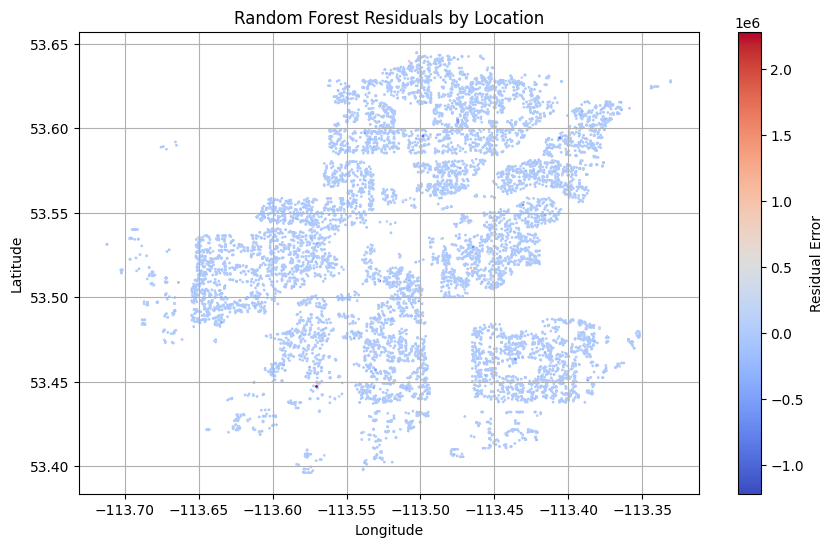

MAPE for RF: 0.07512111387267388


In [51]:

test_coordinates = test_set[['Latitude', 'Longitude']].reset_index(drop=True)
residuals_rf_df = pd.DataFrame({'Latitude': test_coordinates['Latitude'], 'Longitude': test_coordinates['Longitude'], 'Residual': residuals_rf})

plt.figure(figsize=(10, 6))
scatter = plt.scatter(residuals_rf_df['Longitude'], residuals_rf_df['Latitude'], c=residuals_rf_df['Residual'], s = 1, cmap='coolwarm', alpha=1)
plt.colorbar(scatter, label='Residual Error')
plt.title('Random Forest Residuals by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

print(f"MAPE for RF: {mape_rf}")

In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np


xgb_optimized = XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1, random_state=42)


xgb_optimized.fit(train_set_selected, y_train)


y_pred_xgb = xgb_optimized.predict(test_set_selected)

mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

residuals_xgb = y_test - y_pred_xgb




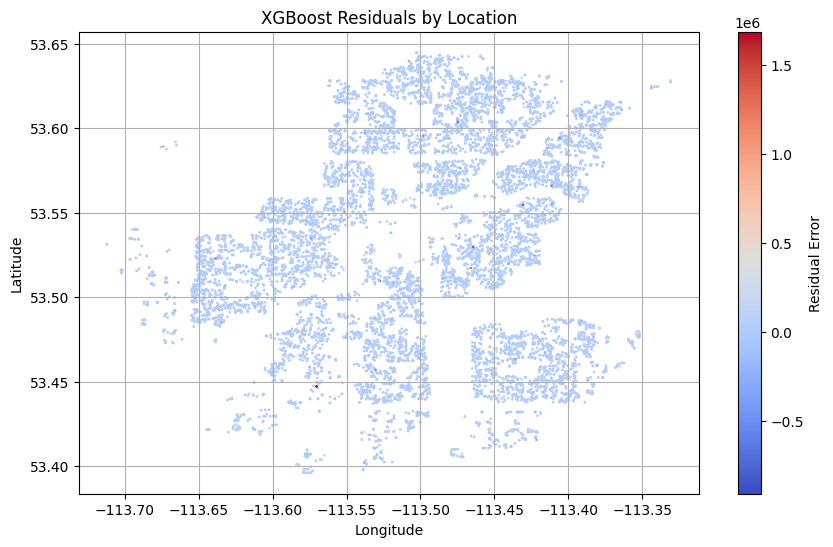

MAPE for XGBoost: 0.11385312531761109


In [53]:


test_coordinates_xgb = test_set[['Latitude', 'Longitude']].reset_index(drop=True)
residuals_xgb_df = pd.DataFrame({'Latitude': test_coordinates_xgb['Latitude'], 'Longitude': test_coordinates_xgb['Longitude'], 'Residual': residuals_xgb})


plt.figure(figsize=(10, 6))
scatter_xgb = plt.scatter(residuals_xgb_df['Longitude'], residuals_xgb_df['Latitude'], c=residuals_xgb_df['Residual'], s = 1, cmap='coolwarm', alpha=1)
plt.colorbar(scatter_xgb, label='Residual Error')
plt.title('XGBoost Residuals by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

print(f"MAPE for XGBoost: {mape_xgb}")


In [ ]:
## Hence it turns out for this project, Random forest model is a better option 